Purpose of this preprocessing:
* For comments, combine all data into one csv file
* For both posts and comments, manipulate the data to add new columns and remove useless columns

In [1]:
USECOLS = ["author", "body", "created_utc", "id",  "permalink", "score"]

In [105]:
# combine all the data into one csv file
# for comments, utilize the "d_" column, then convert them to json, and then convert them to dataframe

import os
import pandas as pd
import numpy as np
import ast
import json

def notNaN(thingy):
    """This function is used to check if the input is NaN, by seeing if it equals itself.
    """
    return thingy == thingy

# get all the comments related files in the directory
path = "data"
files = [file for file in os.listdir(path) if file.startswith("comments")]

comments = []
for file in files:
    df = pd.read_csv(f"{path}/{file}", usecols=["d_"], lineterminator="\n")
    comments.append(df)

comments = pd.concat(comments)
comments.drop_duplicates(inplace=True)

# use ast.literal_eval to convert string to standard json
json_records = [ast.literal_eval(x) for x in comments["d_"] if notNaN(x)]
comments_df = pd.DataFrame(json_records)
comments_df.sort_values("id")
        

,author,body,created_utc,id,permalink,score,created
2561861,HiImBillGate,Thank you fellow undead.,1559952795,eqbpdw2,/r/Eldenring/comments/btibcn/eldenring_has_bee...,10,1.559946e+09
2561860,serdarkny,Hello! History in the making!!!!,1559952835,eqbpg30,/r/Eldenring/comments/by1sm8/welcome_to_relden...,10,1.559946e+09
2561859,DrowningDive,So much better than Great Rune.,1559952854,eqbph3h,/r/Eldenring/comments/btibcn/eldenring_has_bee...,21,1.559946e+09
2561858,serdarkny,Damn he knew.,1559952855,eqbph5y,/r/Eldenring/comments/btibcn/eldenring_has_bee...,9,1.559946e+09
2561857,LostInStatic,who tf made this 11 days ago,1559952890,eqbpj2o,/r/Eldenring/comments/by1sm8/welcome_to_relden...,63,1.559946e+09
...,...,...,...,...,...,...,...
4176378,diazmike752,Probably strength. A lot of enemies can eat a ...,1648249159,i24l5nn,/r/Eldenring/comments/to4f5p/whats_the_most_ch...,1,1.648242e+09
4176377,chicubsn01,Same. And now I need it,1648249161,i24l5ta,/r/Eldenring/comments/tnm0td/margit_fanart/i24...,1,1.648242e+09
4176376,JonnyF1ves,"I mean, it's a good idea to expect anybody in ...",1648249162,i24l5vf,/r/Eldenring/comments/to4l3r/i_hated_melina_th...,1,1.648242e+09
4176375,xShinGouki,I’m quite happy the katana finally gets some l...,1648249167,i24l6af,/r/Eldenring/comments/to4kla/katana_and_blood_...,1,1.648242e+09


In [21]:
import datetime as dt

def utc_to_date_string(utc:int) -> str:
    date = dt.datetime.fromtimestamp(int(utc)).date()
    return date.strftime("%Y-%m-%d")

posts["created_date"] = posts["created_utc"].apply(utc_to_date_string)

posts["selftext"].fillna("", inplace=True)
posts["contents"] = posts["title"] + " " + posts["selftext"]

posts = posts[["id", "created_date", "contents", "score", "author", "created_utc", "url", "full_link", "title", "selftext", "upvote_ratio", "num_comments"]]

posts.to_csv("posts_processes.csv", index=None)
posts.head()

,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
0,tl4xj3,2022-03-23,"Question on how to make my Weapon StrongerHey,...",1,Us3l3ssZ3D,1648059051,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Question on how to make my Weapon Stronger,"Hey, I am currently enjoying the Ornamental St...",1.0,0
1,tl4xd9,2022-03-23,Anyone else get bored after they get to mounta...,1,Key-College-4290,1648059048,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Anyone else get bored after they get to mounta...,"I've done a couple playthroughs now, and a cou...",1.0,0
2,tl4wvb,2022-03-23,NaN,1,Zoiwillxxx,1648059039,https://i.redd.it/607ofk61c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,"Welcome champions, to the Radahn Festival!!!",NaN,1.0,0
3,tl4wpl,2022-03-23,Can’t find player I invaded now I’m stuckSo I ...,1,LuneMiester,1648059036,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Can’t find player I invaded now I’m stuck,So I tried the bloody finger thing for the que...,1.0,0
4,tl4vt6,2022-03-23,NaN,1,Epickartoffelz,1648058994,https://i.redd.it/21h38yc0c6p81.jpg,https://www.reddit.com/r/Eldenring/comments/tl...,:’),NaN,1.0,0


In [106]:
import datetime as dt

def utc_to_date_string(utc) -> str:
    date = dt.datetime.fromtimestamp(utc).date()
    return date.strftime("%Y-%m-%d")

In [109]:
comments.head()

,d_
0,"{'author': 'Bubbly-Diver1999', 'body': 'When I..."
1,"{'author': 'WeTakeWesteros', 'body': ""I guess ..."
2,"{'author': 'PlainLeviathan', 'body': 'I am ove..."
3,"{'author': 'ConsequenceBusy1717', 'body': 'But..."
4,"{'author': 'Existing_Group_3961', 'body': 'The..."


In [114]:
def parent_id(permalink:str) -> str:
    """Get parent id from permalink
    """

    return permalink.split("/")[4]

comments = comments_df
comments["created_date"] = comments["created_utc"].apply(utc_to_date_string)
comments["parent_id"] = comments["permalink"].apply(parent_id)
comments = comments[["author", "body", "created_date", "created_utc", "id", "parent_id", "permalink", "score"]]

comments.to_csv("comments_processed.csv", index=None)
comments.head()

,author,body,created_date,created_utc,id,parent_id,permalink,score
0,Grezzinate,That’s why I really hate that place.,2022-03-22,1647905084,i1lfa2u,tjoy74,/r/Eldenring/comments/tjoy74/this_was_the_most...,1
1,BirdhouseInYourSoil,And you can’t make an altered garment normal. ...,2022-03-22,1647905084,i1lfa1a,tjmwo4,/r/Eldenring/comments/tjmwo4/any_customer_can_...,1
2,Kleftokardos,"You did not discover this, speedrunners have b...",2022-03-22,1647905084,i1lfa0y,tjfmkx,/r/Eldenring/comments/tjfmkx/wanted_to_share_a...,1
3,Frogsplosion,&gt; now useless af after the nerf. \n\nit'l l...,2022-03-22,1647905084,i1lfa0b,tjoua0,/r/Eldenring/comments/tjoua0/found_something_t...,1
4,dorekk,lol,2022-03-22,1647905084,i1lfa05,tjmwo4,/r/Eldenring/comments/tjmwo4/any_customer_can_...,1


In [24]:
def parent_id(permalink:str) -> str:
    """Get parent id from permalink
    """
    
    return permalink.split("/")[4]


In [22]:
a = "/r/Eldenring/comments/tllean/to_those_hackers/"
a.split("/")

['', 'r', 'Eldenring', 'comments', 'tllean', 'to_those_hackers', '']

(-50.150000000000006, 1053.15)

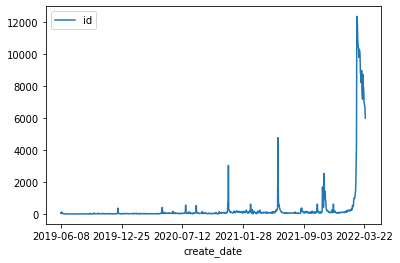

In [11]:
# plot of daily post numbers
from matplotlib import pyplot as plt

df.groupby("create_date").count().plot(y="id")


/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_24283/3843911900.py:1: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("comments_processed.csv")


<AxesSubplot:xlabel='created_date'>

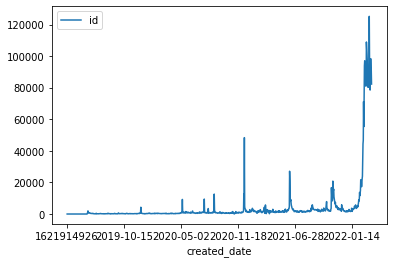

In [116]:
comments = pd.read_csv("comments_processed.csv")
comments.groupby("created_date").count().plot(y="id")

In [9]:
comments.head()

,author,body,created_date,created_utc,id,parent_id,permalink,score
0,Bubbly-Diver1999,When I saw the bear i started to expect this o...,2022-03-01,1646129604,hyw9bc6,t3quwh,/r/Eldenring/comments/t3quwh/thank_you_elden_r...,1
1,WeTakeWesteros,I guess the point is that if it was going to d...,2022-03-01,1646129598,hyw9b2e,t3k2il,/r/Eldenring/comments/t3k2il/none_of_us_were_p...,1
2,PlainLeviathan,I am over 50 hours in and I legitimately want ...,2022-03-01,1646129598,hyw9b1n,t44k3s,/r/Eldenring/comments/t44k3s/radahn_might_be_o...,1
3,ConsequenceBusy1717,But at some point no signs a available anymore...,2022-03-01,1646129597,hyw9b0g,t44dcm,/r/Eldenring/comments/t44dcm/need_help_with_ra...,1
4,Existing_Group_3961,There is another church of communion,2022-03-01,1646129596,hyw9az1,t44p3w,/r/Eldenring/comments/t44p3w/is_there_anything...,1


The concated comments file is huge (>5Gb), which makes it almost impossible to manipulate it on my old macBook. Here is how to optimize the process.

In [13]:
comments = pd.read_csv("data/comments_all.csv", usecols=["author", "body", "created_utc", "id",  "permalink", "score"])

/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_15683/1402063991.py:1: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("data/comments_all.csv", usecols=["author", "body", "created_utc", "id",  "permalink", "score"])


In [6]:
import pandas as pd

reader = pd.read_csv("comments_processes.csv", iterator=True)
try:
    df = reader.get_chunk(100000)
except StopIteration:
    print("Iteration is stopped.")

df.head()

,author,body,created_date,created_utc,id,parent_id,permalink,score
0,Bubbly-Diver1999,When I saw the bear i started to expect this o...,2022-03-01,1646129604,hyw9bc6,t3quwh,/r/Eldenring/comments/t3quwh/thank_you_elden_r...,1
1,WeTakeWesteros,I guess the point is that if it was going to d...,2022-03-01,1646129598,hyw9b2e,t3k2il,/r/Eldenring/comments/t3k2il/none_of_us_were_p...,1
2,PlainLeviathan,I am over 50 hours in and I legitimately want ...,2022-03-01,1646129598,hyw9b1n,t44k3s,/r/Eldenring/comments/t44k3s/radahn_might_be_o...,1
3,ConsequenceBusy1717,But at some point no signs a available anymore...,2022-03-01,1646129597,hyw9b0g,t44dcm,/r/Eldenring/comments/t44dcm/need_help_with_ra...,1
4,Existing_Group_3961,There is another church of communion,2022-03-01,1646129596,hyw9az1,t44p3w,/r/Eldenring/comments/t44p3w/is_there_anything...,1


In [8]:
# Save data to database and create index, to speed up the search
import pandas as pd
import sqlite3

# Create a new database file
db = sqlite3.connect("eldenRing.db")

# Load csv
df = pd.read_csv("comments_processed.csv")
df.to_sql("comments", db, if_exists="replace")

# Add an index on the "created_date" column
db.execute("CREATE INDEX created_date ON comments (created_date)")
db.close

/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_14916/3992757338.py:8: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("comments_processed.csv")


OperationalError: index created_date already exists

In [11]:
db = sqlite3.connect("eldenRing.db")
db.execute("CREATE INDEX created_date ON comments (created_date)")

OperationalError: index created_date already exists

In [46]:
conn = sqlite3.connect("eldenRing.db")
q = "select count(*) from comments"
# q = "create index created_date on comments (created_date)"
conn.execute(q).fetchall()

[(5861286,)]

In [106]:
# posts ordered by num_comments
conn = sqlite3.connect("eldenRing.db")
# q = "select full_link from posts where created_date between '2019-09-23' and '2019-09-25'"
start_date = "2019-09-23"
end_date = "2019-09-25"
q = f"""
with posts_ordered as (
    select full_link, contents, created_date, score, num_comments,
    rank() over (by num_comments desc) as ranking
    from posts
    where created_date between {start_date} and {end_date}
    )

select * from posts_ordered where ranking <= 10
"""

# q = """
# select * from comments
# where created_date between '2019-10-06' and '2019-10-12'
# """

# q = "create index created_date on comments (created_date)"
df = pd.read_sql(q, conn)
df

DatabaseError: Execution failed on sql '
with posts_ordered as (
    select full_link, contents, created_date, score, num_comments,
    rank() over (by num_comments desc) as ranking
    from posts
    where created_date between 2019-09-23 and 2019-09-25
    )

select * from posts_ordered where ranking <= 10
': near "num_comments": syntax error

In [80]:
df.to_clipboard()

In [147]:
# a week's top 10 commented posts
conn = sqlite3.connect("eldenRing.db")
# q = "select full_link from posts where created_date between '2019-09-23' and '2019-09-25'"
start_date = "2020-09-23"
end_date = "2020-09-29"

q = f"""
with perma as(
select parent_id, count(*) num_comments from comments
where created_date between "2020-09-23" and "2020-09-25"
group by parent_id
order by num_comments desc
limit 10
)

select p.parent_id, p.num_comments, po.full_link, po.contents, po.created_date, po.score, po.num_comments
from perma p left join posts po
on p.parent_id = po.id
"""

# conn.execute(q).fetchall()

# q = "create index created_date on comments (created_date)"
df = pd.read_sql(q, conn)
df

[('izbmya', 81, None, None, None, None, None),
 ('ixk3es', 72, None, None, None, None, None),
 ('izbihc', 71, None, None, None, None, None),
 ('iycexi',
  44,
  'https://www.reddit.com/r/Eldenring/comments/iycexi/geoff_liked/',
  'Geoff liked ',
  '2020-09-23',
  1,
  44),
 ('iy9ft5', 44, None, None, None, None, None),
 ('iy4j8p', 43, None, None, None, None, None),
 ('ixz3zz',
  37,
  'https://www.reddit.com/r/Eldenring/comments/ixz3zz/what_ms_is_saying_to_expect_from_their_tgs/',
  'What MS is saying to expect from their TGS showing "Games from recent months" precludes ER and ER isn\'t on Bandai Namco schedule nor is From there. NO ER at TSG is all but confirmed ',
  '2020-09-23',
  1,
  37),
 ('iy5fiw', 35, None, None, None, None, None),
 ('iz5hp1',
  33,
  'https://www.reddit.com/r/Eldenring/comments/iz5hp1/new_4chan_leak_looks_legit/',
  'new 4chan leak, looks legit ',
  '2020-09-24',
  1,
  35),
 ('iz4a0e',
  33,
  'https://www.reddit.com/r/Eldenring/comments/iz4a0e/reciting_every

In [172]:
q = """
select id, title, created_date, url, full_link, score, num_comments from posts
where created_date between '2021-08-18' and '2021-08-24'
order by num_comments desc
limit 10
"""

pd.read_sql(q, conn)

,id,title,created_date,url,full_link,score,num_comments
0,p8lw86,Do it.,2021-08-21,https://i.redd.it/2wmwb1nqeni71.jpg,https://www.reddit.com/r/Eldenring/comments/p8...,18,557
1,p8uf9l,This can’t possibly end well,2021-08-21,https://i.redd.it/vqe1wj08mqi71.jpg,https://www.reddit.com/r/Eldenring/comments/p8...,39,489
2,pa3iwn,do you think the soulsborne community is toxic?,2021-08-23,https://www.reddit.com/r/Eldenring/comments/pa...,https://www.reddit.com/r/Eldenring/comments/pa...,1,458
3,p83wkj,Soon (I hope),2021-08-20,https://i.redd.it/k6sddk2m7ii71.jpg,https://www.reddit.com/r/Eldenring/comments/p8...,1901,454
4,p8d4gv,Accurate,2021-08-20,https://v.redd.it/3o7ouekzmki71,https://www.reddit.com/r/Eldenring/comments/p8...,1440,443
5,p8fr7j,"""Graphics look identical to Dark Souls 3."" Oka...",2021-08-21,https://i.redd.it/tdtobuyvcli71.jpg,https://www.reddit.com/r/Eldenring/comments/p8...,332,297
6,pamgtb,FromSoftware developing dark souls 3 back in 2...,2021-08-24,https://i.redd.it/tz01eq38waj71.jpg,https://www.reddit.com/r/Eldenring/comments/pa...,1,295
7,p6genx,Yeah in 2022 we will get EldenRing 💀🔥 I don’t ...,2021-08-18,https://i.redd.it/qv4u7kski0i71.jpg,https://www.reddit.com/r/Eldenring/comments/p6...,1,224
8,p8uqeg,Facts .,2021-08-21,https://i.redd.it/uoglv78voqi71.jpg,https://www.reddit.com/r/Eldenring/comments/p8...,42,204
9,p9yd20,Hear me out: Terror Swamps,2021-08-23,https://i.redd.it/97ljp8rkk3j71.png,https://www.reddit.com/r/Eldenring/comments/p9...,1,194


In [174]:
q = """
select id, title, created_date, url, full_link, score, num_comments from posts
where url like "%.jpg" or url like "%.png" or url like "%.gif"
order by num_comments desc
limit 20
"""

pd.read_sql(q, conn)

,id,title,created_date,url,full_link,score,num_comments
0,k9kfkc,The flair looks good but it's not that big of ...,2020-12-09,https://i.redd.it/4fj1djdc43461.jpg,https://www.reddit.com/r/Eldenring/comments/k9...,1,4394
1,kau3ll,I guess it's time to issue more flairs...,2020-12-11,https://i.imgur.com/pLrnw6n.jpg,https://www.reddit.com/r/Eldenring/comments/ka...,1,3999
2,nzntmp,OOOOOOOOOOOHHH,2021-06-14,https://i.redd.it/l5xkd44op8571.jpg,https://www.reddit.com/r/Eldenring/comments/nz...,8786,2305
3,o0dbbn,So they just make another Dark Souls?,2021-06-15,https://i.redd.it/t7vyuyk1cf571.jpg,https://www.reddit.com/r/Eldenring/comments/o0...,4592,1701
4,qqp9pr,Trigger this subreddit with only one sentence,2021-11-10,https://i.redd.it/t0aewvdr4qy71.jpg,https://www.reddit.com/r/Eldenring/comments/qq...,1,1523
5,ksxn8w,I hope these ppl are going to have their exclu...,2021-01-08,https://i.redd.it/yvlgdadx82a61.jpg,https://www.reddit.com/r/Eldenring/comments/ks...,1,1515
6,ss65mj,PC system requirements on FROMSOFTWARE's websi...,2022-02-14,https://i.redd.it/hsz3kkcsjrh81.png,https://www.reddit.com/r/Eldenring/comments/ss...,1,1279
7,o5k7n8,😳,2021-06-22,https://i.redd.it/wunlbi5vrs671.jpg,https://www.reddit.com/r/Eldenring/comments/o5...,1,1151
8,qzkutl,Not like we had a game test with 12hr to play smh,2021-11-22,https://i.redd.it/j5lm0ek4a5181.jpg,https://www.reddit.com/r/Eldenring/comments/qz...,1,1071
9,nxf3b0,Ignorant slaves,2021-06-11,https://i.redd.it/ovi0gszttm471.png,https://www.reddit.com/r/Eldenring/comments/nx...,1,995


In [146]:
# use params in read_sql
q = "select id, title, url, full_link from posts where created_date between ? and ?"
columns = ["id", "title", "url", "full_link",]
start_date = "2020-09-23"
end_date = "2020-09-25"
params = (columns, start_date, end_date)
conn.execute(q, params).fetchall()

# pd.read_sql(q, conn, params=(start_date, end_date))

OperationalError: no such function: unnest

In [140]:
q = "select * from posts limit 1"

pd.read_sql(q, conn)

,index,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
0,0,tl4xj3,2022-03-23,Question on how to make my Weapon Stronger Hey...,1,Us3l3ssZ3D,1648059051,https://www.reddit.com/r/Eldenring/comments/tl...,https://www.reddit.com/r/Eldenring/comments/tl...,Question on how to make my Weapon Stronger,"Hey, I am currently enjoying the Ornamental St...",1.0,0


In [136]:
# every week's top 10 commented posts
import datetime as dt

start_date = "2019-06-08"
end_date = "2019-06-14"

columns = ["id", "title", "url", "full_link",]

def add_a_week(date: str) -> str:
    date_format = "%Y-%m-%d"
    date = dt.datetime.strptime(date, date_format)
    date += dt.timedelta(weeks=1)
    return date.strftime(date_format)

conn = sqlite3.connect("eldenRing.db")

while end_date <= "2022-03-28":
    week = f"{start_date} to {end_date}"

    q = """
        with perma as(
        select parent_id, count(*) num_comments from comments
        where created_date between ? and ?
        group by parent_id
        order by num_comments desc
        limit 10
        )

        select p.parent_id, p.num_comments, po.full_link, po.contents, po.created_date, po.score, po.num_comments
        from perma p left join posts po
        on p.parent_id = po.id
        """

    params = (start_date, end_date)

    conn.execute(q, params).fetchall()





'2020-09-30'

In [191]:
# plot of number of posts that mentioned [KEY WORDS]

names = ["ranni", "renna", "snow witch", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "malenia", "pot boy", "fia", "patches", "jorge", "yakul", "hodir", "mimic tear", "rya", "sellen"]

q = """
select * from comments
where body like '%melina%' or body like "%ranni%" or body like "%radahn%" or body like "%godrick%" or body like "%margit%" or body like "%valkyrie%" or body like "%Malenia%"
"""
df = pd.read_sql(q, conn)
# df.groupby("created_date").count().plot(y="id")
df.to_csv("comments_with_names.csv", index=False)

In [4]:
# get rows with that match NAMES
from typing import List
import sqlite3
import pandas as pd


def query_to_get_rows_with_names(table_name: str) -> str:
    NAMES = ["ranni", "renna", "snow witch", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "malenia", "pot boy", "fia", "patches", "jorge", "yakul", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "alexander", "irina", "latenna", "bloody wolf", "raging wolf"]

    q = f"""
    select * from {table_name}
    where 
    """
    
    if table_name == "comments":
        for name in NAMES:
            q = q + f" body like '%{name}%' or"
    else:
        for name in NAMES:
            q = q + f" contents like '%{name}%' or"
    
    q = q[:-2]

    conn = sqlite3.connect("eldenRing.db")

    df = pd.read_sql(q, conn)

    df.to_csv(f"{table_name}_with_names.csv", index=False)
    

q = query_to_get_rows_with_names("comments")


<AxesSubplot:xlabel='created_date'>

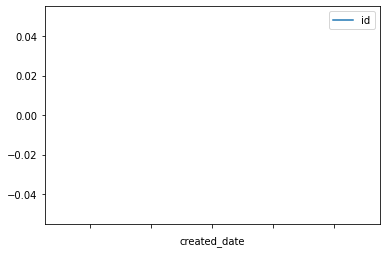

In [3]:
# plot of number of posts that mentioned [KEY WORDS]
import pandas as pd
import sqlite3

conn = sqlite3.connect("eldenRing.db")
q = """
select * from posts
where contents like "moon queen"
"""
df = pd.read_sql(q, conn)
df.groupby("created_date").count().plot(y="id")
# df.to_csv("posts_with_names.csv", index=False)

In [193]:
df.contents.values[:4]

array(['Welcome champions, to the Radahn Festival!!! ',
       "Did I miss something?  Unfortunately I'm a bit confused right now. I played the game with my first character up to the mimic boss.\n\nI've been playing a new character for a few days, but somehow it's all strange, for example with my first character I was with Renna, who then sent me down to Blaidd, that's when I met him for the first time, he gave me an order.  \n\nBut with my 2nd char it was strange, before I arrived at Renna, I defeated this Radahn, only that was strange, when I rode to this fortress there were no Fire catapults shooting at me and there were no opponents in the fortress either, with mine first char were opponents and also catapults AND before Radahn I had to fight against two Bpsse at the same time, it was such a dog and a strong knight.\n\nWith my second, they weren't there, I was able to activate the light right away and the celebration began, that's when I met Blaidd for the first time with my 2nd ch

<AxesSubplot:xlabel='created_date'>

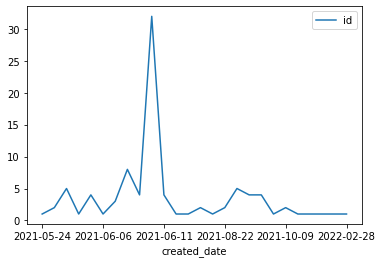

In [92]:
df.groupby("created_date").count().plot(y="id")

In [230]:
names = ["a", "b", "c"]

q = f"""
select * from posts
where 
"""

for i in names:
    q = q + f" contents like '%{i}%' or"

q = q[:-2]

q

"\nselect * from posts\nwhere \n contents like '%a%' or contents like '%b%' or contents like '%c%' "

In [9]:
import sqlite3

name = "mimic tear"

conn = sqlite3.connect("eldenRing.db")
q_posts = f"""
select * from posts
where contents like "%{name}%"
order by created_date
limit 1
"""

q_comments = f"""
select * from comments
where body like "%{name}%"
order by created_date
limit 1
"""

conn.execute(q_comments).fetchall()

[(3284267,
  'blackforestcheezcake',
  "I still remember the first time i encountered a mimic. The experience changes you forever.\n\nSo i remembered in dark souls navigating sen's fortress thru trial by error. After dodging and going around all the traps, (swinging axes, boulders, arrows, you name it, sen's got it), i made my way into this little room.\n\nYou really got to hand it to from soft, they really knew how to make a level. That room was a welcome respite after having my guard all up. So i saw this chest, and i thought, oh great a reward after all that hard work. On hindsight i should have noticed the bloodstains, but nope didnt suspect anything and there were no ghosts\n\nThen i opened it.\n\nYou could probably guess what happened next, that blasted chest suddenly clam down on my character, gave me a frigging jump scare. Horror quickly turned into anger into disbelief as i watched that mimic tear a new asshole, it was clear my character will not be coming back from this, and 